In [2]:
def TowerOfHanoi(n, from_rod, to_rod, aux_rod):
    if n == 0:
        return
    TowerOfHanoi(n-1, from_rod, aux_rod, to_rod)
    print("Move disk", n, "from rod", from_rod, "to rod", to_rod)
    TowerOfHanoi(n-1, aux_rod, to_rod, from_rod)

# Driver code
N = 3

# A, C, B are the name of rods
TowerOfHanoi(N, 'A', 'C', 'B')

Move disk 1 from rod A to rod C
Move disk 2 from rod A to rod B
Move disk 1 from rod C to rod B
Move disk 3 from rod A to rod C
Move disk 1 from rod B to rod A
Move disk 2 from rod B to rod C
Move disk 1 from rod A to rod C


In [2]:
b = ["-" for _ in range(9)]     #board

def p():         #print
    for i in range(0, 9, 3):
        print(" | ".join(b[i:i+3]))
    print()

def t(player):   #turn
    i = int(input(f"{player}'s turn. Choose a position from 1-9: ")) - 1
    while b[i] != "-":
        i = int(input("Position already taken. Choose a different position: ")) - 1
    b[i] = player
    p()

def c():         #check
    w = [[0, 1, 2], [3, 4, 5], [6, 7, 8], [0, 3, 6], [1, 4, 7], [2, 5, 8], [0, 4, 8], [2, 4, 6]]
    return "win" if any(b[c[0]] == b[c[1]] == b[c[2]] != "-" for c in w) else "tie" if "-" not in b else "play"

def g():         #game
    p()
    current_player = "X"
    while True:
        t(current_player)
        result = c()
        if result in ["win", "tie"]:
            print(f"{current_player} wins!" if result == "win" else "It's a tie!")
            break
        current_player = "O" if current_player == "X" else "X"

g()

- | - | -
- | - | -
- | - | -

X's turn. Choose a position from 1-9: 2
- | X | -
- | - | -
- | - | -

O's turn. Choose a position from 1-9: 3
- | X | O
- | - | -
- | - | -

X's turn. Choose a position from 1-9: 4
- | X | O
X | - | -
- | - | -

O's turn. Choose a position from 1-9: 1
O | X | O
X | - | -
- | - | -

X's turn. Choose a position from 1-9: 5
O | X | O
X | X | -
- | - | -

O's turn. Choose a position from 1-9: 5
Position already taken. Choose a different position: 6
O | X | O
X | X | O
- | - | -

X's turn. Choose a position from 1-9: 7
O | X | O
X | X | O
X | - | -

O's turn. Choose a position from 1-9: 8
O | X | O
X | X | O
X | O | -

X's turn. Choose a position from 1-9: 9
O | X | O
X | X | O
X | O | X

It's a tie!


In [4]:
from itertools import permutations

def solve():
    for p in permutations('0123456789', 8):
        s, e, n, d, m, o, r, y = map(int, p)
        # Avoid permutations where 'M' is 0 as it's the first letter in "MONEY"
        if m == 0:
            continue

        send = 1000 * s + 100 * e + 10 * n + d
        more = 1000 * m + 100 * o + 10 * r + e
        money = 10000 * m + 1000 * o + 100 * n + 10 * e + y

        if send + more == money:
            return f'S={s}, E={e}, N={n}, D={d}, M={m}, O={o}, R={r}, Y={y}'
    return None


result = solve()
if result:
    print("Solution found:")
    print(result)
else:
    print("No solution exists.")


Solution found:
S=9, E=5, N=6, D=7, M=1, O=0, R=8, Y=2


In [4]:
from collections import deque
def bfs(graph, start):
  visited = set() # To keep track of visited nodes
  queue = deque([start]) # Initialize the queue with the start node
  while queue:
    node = queue.popleft() # Dequeue a node from the left
    if node not in visited:
      print(node, end=" ") # Process the node
      visited.add(node)
 # Enqueue all adjacent nodes that haven't been visited
      for neighbor in graph[node]:
        if neighbor not in visited:
          queue.append(neighbor)
# Example graph
graph = {
 'A': ['B', 'C'],
 'B': ['D', 'E'],
 'C': ['F'],
 'D': [],
 'E': ['F'],
 'F': []
}
print("BFS Traversal:")
bfs(graph, 'A')

BFS Traversal:
A B C D E F 

In [5]:
def dfs(graph, node, visited=None):
  if visited is None:
    visited = set() # Initialize the visited set
  visited.add(node)
  print(node, end=" ") # Process the node
  for neighbor in graph[node]:
    if neighbor not in visited:
      dfs(graph, neighbor, visited)
# Example graph, same as used in BFS
print("\nDFS Traversal:")
dfs(graph, 'A')



DFS Traversal:
A B D E F C 

In [6]:
from queue import PriorityQueue

def best_first_search(actual_src, target, graph):
    visited = set()
    pq = PriorityQueue()
    pq.put((0, actual_src))
    visited.add(actual_src)

    while not pq.empty():
        cost, u = pq.get()
        print(u, end=" ")
        if u == target:
            break

        for v, c in graph[u]:
            if v not in visited:
                visited.add(v)
                pq.put((c, v))
    print()

def add_edge(graph, x, y, cost):
    graph[x].append((y, cost))
    graph[y].append((x, cost))

graph = [[] for _ in range(14)]
add_edge(graph, 0, 1, 3)
add_edge(graph, 0, 2, 6)
add_edge(graph, 0, 3, 5)
add_edge(graph, 1, 4, 9)
add_edge(graph, 1, 5, 8)
add_edge(graph, 2, 6, 12)
add_edge(graph, 2, 7, 14)
add_edge(graph, 3, 8, 7)
add_edge(graph, 8, 9, 5)
add_edge(graph, 8, 10, 6)
add_edge(graph, 9, 11, 1)
add_edge(graph, 9, 12, 10)
add_edge(graph, 9, 13, 2)

print("Path from 0 to 9:")
best_first_search(0, 9, graph)

Path from 0 to 9:
0 1 3 2 8 9 


In [8]:
import random

def monty_hall(simulations=1000, switch=True):
    wins = 0
    for _ in range(simulations):
        doors = ['goat', 'goat', 'car']
        random.shuffle(doors)  # Randomly place a car and goats behind the three doors
        choice = random.randint(0, 2)  # Contestant's initial choice
        # Monty opens a door that was not chosen by the contestant and has a goat
        open_door = next(i for i in range(3) if i != choice and doors[i] == 'goat')
        if switch:  # If the contestant chooses to switch
            remaining_door = next(i for i in range(3) if i != choice and i != open_door)
            choice = remaining_door
        wins += (doors[choice] == 'car')
    return wins

# Run simulations
simulations_count = 10000
win_with_switch = monty_hall(simulations_count, switch=True)
win_without_switch = monty_hall(simulations_count, switch=False)

print(f"Winning by switching: {win_with_switch/simulations_count:.2%}")
print(f"Winning without switching: {win_without_switch/simulations_count:.2%}")


Winning by switching: 66.16%
Winning without switching: 33.60%


In [17]:
def unify(term1, term2):
      if isinstance(term1, list) and isinstance(term2, list):
          if len(term1) != len(term2):
              return None
          return {t1: t2 for t1, t2 in zip(term1, term2)}
      elif term1 == term2:
          return {}
      elif isinstance(term1, str) and term1[0].islower():
          return {term1: term2}
      elif isinstance(term2, str) and term2[0].islower():
          return {term2: term1}
      return None


# Test cases
term1 = ['P', 'x', 'y']
term2 = ['P', 'A', 'B']
print(unify(term1, term2))  # Output: {'x': 'A', 'y': 'B'}

term3 = ['Q', 'y', 'z']
term4 = ['Q', 'C', 'D']
print(unify(term3, term4))  # Output: {'y': 'C', 'z': 'D'}

term5 = ['y', 'A', 'B']
term6 = ['S', 'A', 'B']
print(unify(term5, term6))  # Output: None

term7 = 'x'
term8 = 'y'
print(unify(term7, term8))  # Output: {'x': 'y'}

term9 = 'z'
term10 = 'A'
print(unify(term9, term10))  # Output: {'z': 'A'}

term11 = 'P'
term12 = ['P', 'x', 'y']
print(unify(term11, term12))  # Output: None

{'P': 'P', 'x': 'A', 'y': 'B'}
{'Q': 'Q', 'y': 'C', 'z': 'D'}
{'y': 'S', 'A': 'A', 'B': 'B'}
{'x': 'y'}
{'z': 'A'}
None


In [13]:
def resolve(clause1, clause2):
    # This function attempts to resolve two clauses
    resolvent = []
    for p1 in clause1:
        for p2 in clause2:
            # Check if one is the negation of the other
            if p1 == '~' + p2 or p2 == '~' + p1:
                # Exclude the resolved literals and combine the rest
                new_clause = set(clause1 + clause2) - {p1, p2}
                resolvent.extend(new_clause)
                return list(new_clause)
    return resolvent  # Return the resolvent clause or an empty list if no resolution possible

# Example usage
clause1 = ["~P", "Q"]
clause2 = ["~Q", "~R"]
resolvent = resolve(clause1, clause2)
print(resolvent)  # Expected output: ['Q', '~R']


['~R', '~P']


In [21]:
import torch
from transformers import AutoTokenizer, AutoModelWithLMHead

tokenizer=AutoTokenizer.from_pretrained('T5-base')
model=AutoModelWithLMHead.from_pretrained('T5-base', return_dict=True)

sequence = ("Data science is an interdisciplinary field[10] focused on extracting knowledge from typically large data sets and applying the knowledge and insights from that data to solve problems in a wide range of application domains.[11] The field encompasses preparing data for analysis, formulating data science problems, analyzing data, developing data-driven solutions, and presenting findings to inform high-level decisions in a broad range of application domains. As such, it incorporates skills from computer science, statistics, information science, mathematics, data visualization, information visualization, data sonification, data integration, graphic design, complex systems, communication and business.[12][13] Statistician Nathan Yau, drawing on Ben Fry, also links data science to human–computer interaction: users should be able to intuitively control and explore data.[14][15] In 2015, the American Statistical Association identified database management, statistics and machine learning, and distributed and parallel systems as the three emerging foundational professional communities.[16]")
inputs=tokenizer.encode("sumarize: " +sequence,return_tensors='pt', max_length=512, truncation=True)

output = model.generate(inputs, min_length=80, max_length=100)
summary=tokenizer.decode(output[0])

print(summary)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/auto/modeling_auto.py:1699: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

<pad> data science is an interdisciplinary field focused on extracting knowledge from typically large data sets. it incorporates skills from computer science, statistics, information science, mathematics, data visualization, information visualization, data sonification, graphic design, complex systems, communication and business. the field encompasses preparing data for analysis, formulating data science problems, analyzing data, developing data-driven solutions.</s>


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

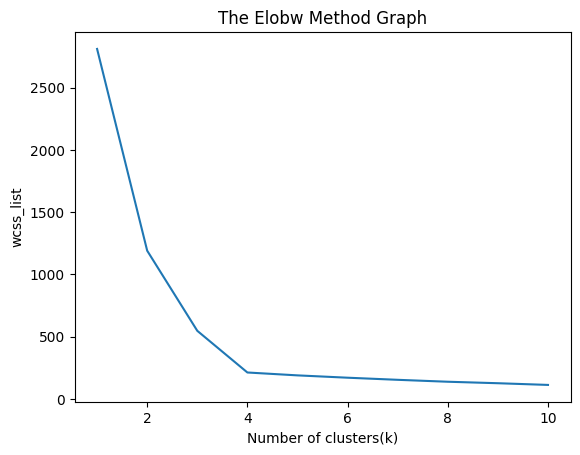

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


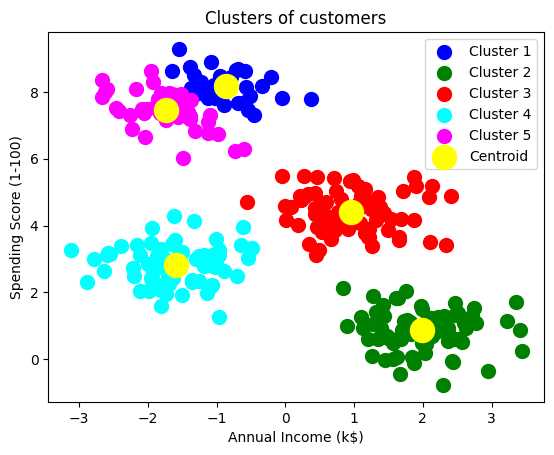

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

dataset = pd.read_csv('/content/Mall_Customers.csv')
#x = dataset.iloc[:, [3, 4]].values
x, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)


wcss_list= []  #Initializing the list for the values of WCSS
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

#training the K-means model on a dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)

#visulaizing the clusters
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 18s 5ms/step - loss: 0.1520 - accuracy: 0.9522 - val_loss: 0.0497 - val_accuracy: 0.9852
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0465 - accuracy: 0.9853 - val_loss: 0.0526 - val_accuracy: 0.9836
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0341 - accuracy: 0.9895 - val_loss: 0.0335 - val_accuracy: 0.9888
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0260 - accuracy: 0.9918 - val_loss: 0.0363 - val_accuracy: 0.9897
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0201 - accuracy: 0.9934 - val_loss: 0.0285 - val_accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.0281 - val_accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - 

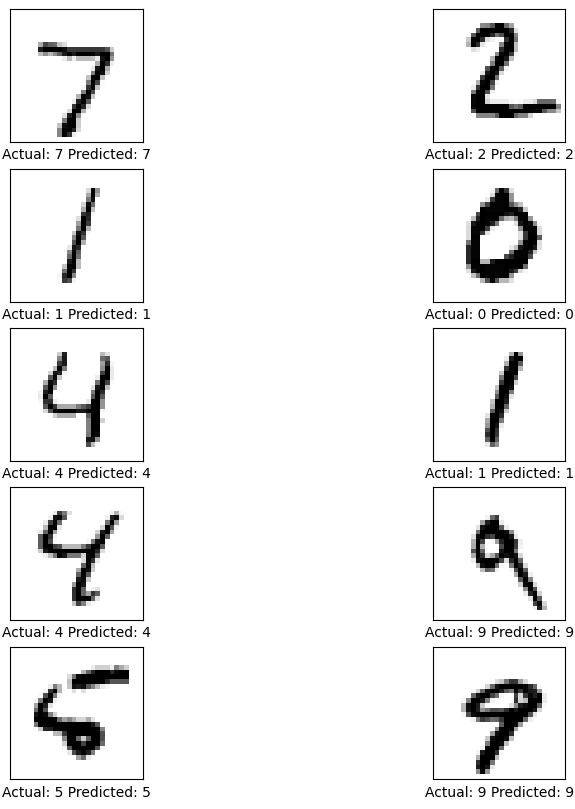

In [31]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Load and prepare the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Reshape images to the format the model expects (adding channel dimension)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Create the convolutional base
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
])

# Add dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict on the test dataset
test_predictions = model.predict(test_images)
test_predictions = np.argmax(test_predictions, axis=1)  # Convert from logits to class index

# Print a classification report
print(classification_report(test_labels, test_predictions, target_names=[str(i) for i in range(10)]))

# Display 10 test cases
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"Actual: {test_labels[i]} Predicted: {test_predictions[i]}")
plt.show()
